# Opening a ramen restaurant in Tokyo 

## Introduction/Business Problem

Our customer wants to open a ramen restaurant in Tokyo, and for that reason has asked us which would be the more convenient location for doing so. In order to find the best possible answers, we are going to check where are most ramen restaurants located, in which of tokyo’s wards you can find the most restaurants and finally how are they spread across Tokyo.

### Importing libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
from bs4 import BeautifulSoup

#!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!pip install folium
#import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


## Obtaining the data

In order to look for the ramen restaurants in Tokyo, I will retrieve the wards of Tokyo from Wikipedia. And for the location of each restaurant I will use the Foursquares API, to look for every ramen restaurant in Tokyo.

In [2]:
req = requests.get("https://en.wikipedia.org/wiki/Special_wards_of_Tokyo#List_of_special_wards")
soup = BeautifulSoup(req.content,'lxml')
table = soup.find_all('table')[3]
df = pd.read_html(str(table))
df_wards=pd.DataFrame(df[0])

In [3]:
df_wards.head()

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


### Filter the data 

We only need the name of the neighborhood

In [4]:
df_wards_filtered = pd.DataFrame(df_wards[['Name','Kanji']])
df_wards_filtered

,Name,Kanji
0,Chiyoda,千代田区
1,Chūō,中央区
2,Minato,港区
3,Shinjuku,新宿区
4,Bunkyō,文京区
5,Taitō,台東区
6,Sumida,墨田区
7,Kōtō,江東区
8,Shinagawa,品川区
9,Meguro,目黒区


In [5]:
df_wards_filtered.drop([23], inplace=True)
df_wards_filtered

,Name,Kanji
0,Chiyoda,千代田区
1,Chūō,中央区
2,Minato,港区
3,Shinjuku,新宿区
4,Bunkyō,文京区
5,Taitō,台東区
6,Sumida,墨田区
7,Kōtō,江東区
8,Shinagawa,品川区
9,Meguro,目黒区


In [6]:
df_wards_filtered.shape

(23, 2)

Obtain the cordenates of each neighborhood

In [7]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Tokyo_explorer")

df_wards_filtered['Major_Dist_Coord']= df_wards_filtered['Kanji'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df_wards_filtered[['Latitude', 'Longitude']] = df_wards_filtered['Major_Dist_Coord'].apply(pd.Series)

df_wards_filtered.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df_wards_filtered

,Name,Kanji,Latitude,Longitude
0,Chiyoda,千代田区,35.693810,139.753216
1,Chūō,中央区,35.666255,139.775565
2,Minato,港区,35.643227,139.740055
3,Shinjuku,新宿区,35.693763,139.703632
4,Bunkyō,文京区,35.718810,139.744732
5,Taitō,台東区,35.717450,139.790859
6,Sumida,墨田区,35.700429,139.805017
7,Kōtō,江東区,35.649154,139.812790
8,Shinagawa,品川区,35.599252,139.738910
9,Meguro,目黒区,35.621250,139.688014


### Location for the ramen restaurants in each neighborhood

Retrieve the data from foursquare and get the location of all the ramen restaurants around each neighborhood

In [14]:
CLIENT_ID = '1EDMFRHVD2CN2DBN1RVEF3Y5ZNO1PCYKYL4HCNJ2IIQIFXS1' 
CLIENT_SECRET = 'GXCQYXEXWMVB0MVEPBL3FNQMGHMXYINLSJWNEH4AZAD53U44' 
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)

Your credentails:
CLIENT_ID: 1EDMFRHVD2CN2DBN1RVEF3Y5ZNO1PCYKYL4HCNJ2IIQIFXS1


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 500
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
           '55a59bace4b013909087cb24') #ID for ramen
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [16]:
Tokyo_ramen = getNearbyVenues(names=df_wards_filtered['Name'],
                                   latitudes=df_wards_filtered['Latitude'],
                                   longitudes=df_wards_filtered['Longitude']
                                  )

Chiyoda
Chūō
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ōta
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


In [17]:
Tokyo_ramen.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
1,Chiyoda,35.69381,139.753216,Fukumen Tomo (覆麺 智),35.696403,139.757070,Ramen Restaurant
2,Chiyoda,35.69381,139.753216,Yojinbo (用心棒),35.696409,139.756696,Ramen Restaurant
3,Chiyoda,35.69381,139.753216,Ramen Jiro (ラーメン二郎 神田神保町店),35.696390,139.756477,Ramen Restaurant
4,Chiyoda,35.69381,139.753216,Tanaka Sobaten (田中そば店),35.696468,139.751222,Ramen Restaurant


Add all together and count how amny ramen restaurants has every neighborhood

In [18]:
Tokyo_neighborhood = Tokyo_ramen['Neighborhood'].value_counts().to_frame(name='Ramen restaurants')
Tokyo_neighborhood= Tokyo_neighborhood.reset_index()
Tokyo_neighborhood.rename(index=str, columns={"index": "Neighborhood", "Ramen restaurants": "Ramen Restaurants"}, inplace=True)
Tokyo_neighborhood

,Neighborhood,Ramen Restaurants
0,Shinjuku,89
1,Ōta,54
2,Shibuya,30
3,Toshima,27
4,Chiyoda,16
5,Kita,16
6,Taitō,15
7,Suginami,9
8,Chūō,9
9,Nakano,5


### Plotting the results

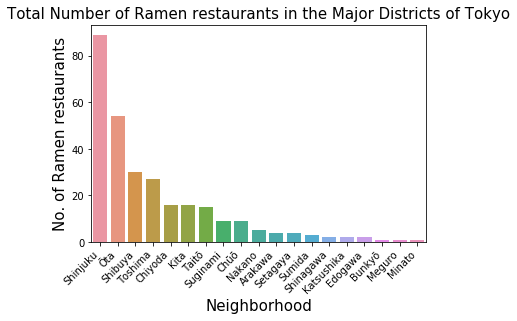

<Figure size 1296x504 with 0 Axes>

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Neighborhood", y="Ramen Restaurants", data=Tokyo_neighborhood)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Total Number of Ramen restaurants in the Major Districts of Tokyo', fontsize=15)
plt.xlabel("Neighborhood", fontsize=15)
plt.ylabel ("No. of Ramen restaurants", fontsize=15)
fig = plt.figure(figsize=(18,7))
plt.show()

We can observe that most of the ramen restaurants are concentrated in the shinjuku neighborhood, followed by Ota and Shibuya

## Clustering, identify areas with a lot of ramen restaurants 

In order to make a more in-depth analysis, I’m going to check what is the density of ramen restaurants in Tokyo and separate them into clusters. I’m going to identify areas with a lot of ramen restaurants. For doing so I’m not going to take into account in which ward they belong to. I’m just going to use their location and distance between them. 

In [21]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

I am going to use the coordenates of every ramen restaurant in Tokyo

In [22]:
df_cluster = pd.DataFrame(Tokyo_ramen[['Venue Latitude','Venue Longitude']])
df_cluster.head()

,Venue Latitude,Venue Longitude
0,35.695539,139.754851
1,35.696403,139.757070
2,35.696409,139.756696
3,35.696390,139.756477
4,35.696468,139.751222


In [23]:
k_means = KMeans(n_clusters = 5, n_init = 12,random_state=0).fit(df_cluster)

In [24]:
k_means_labels = k_means.labels_
k_means_labels.shape

(290,)

In [25]:
Tokyo_ramen.shape

(290, 7)

In [26]:
# add clustering labels

Tokyo_ramen.insert(0, 'Cluster Labels', k_means_labels)
Tokyo_ramen.head()

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
1,2,Chiyoda,35.69381,139.753216,Fukumen Tomo (覆麺 智),35.696403,139.757070,Ramen Restaurant
2,2,Chiyoda,35.69381,139.753216,Yojinbo (用心棒),35.696409,139.756696,Ramen Restaurant
3,2,Chiyoda,35.69381,139.753216,Ramen Jiro (ラーメン二郎 神田神保町店),35.696390,139.756477,Ramen Restaurant
4,2,Chiyoda,35.69381,139.753216,Tanaka Sobaten (田中そば店),35.696468,139.751222,Ramen Restaurant


### Plotting the clusters

In [27]:
!pip install folium
import folium # plotting library

     |████████████████████████████████| 102kB 7.0MB/s ta 0:00:011


Look for the coordenates of Tokyo for printing the Tokyo map

In [28]:
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Tokyo are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tokyo are 35.6828387, 139.7594549.


In [29]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [30]:
list_rest_no =Tokyo_neighborhood['Ramen Restaurants'].to_list()
list_dist =Tokyo_neighborhood['Neighborhood'].to_list()

In [31]:
kclusters = 5
# create map
map_ramen = folium.Map(location=[latitude,longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
#Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(Tokyo_ramen['Venue Latitude'], 
                                  Tokyo_ramen['Venue Longitude'], 
                                  Tokyo_ramen['Neighborhood'], 
                                  Tokyo_ramen['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_ramen)
       
map_ramen

### Checking the clusters

### Cluster 1

In [32]:
Tokyo_ramen.loc[Tokyo_ramen['Cluster Labels'] == 0]

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
134,0,Shinagawa,35.599252,139.738910,ラーメン亭ふう,35.597691,139.737947,Ramen Restaurant
135,0,Shinagawa,35.599252,139.738910,ラーメン吉吉,35.598286,139.738541,Ramen Restaurant
137,0,Ōta,35.561206,139.715843,ラーメン 鷹の目 蒲田店,35.560627,139.714125,Ramen Restaurant
138,0,Ōta,35.561206,139.715843,Arakiya (元祖旨辛系タンメン 荒木屋),35.561988,139.712531,Ramen Restaurant
139,0,Ōta,35.561206,139.715843,Kokoro (麺屋こころ),35.561772,139.713925,Ramen Restaurant
140,0,Ōta,35.561206,139.715843,Ramen Hiiki (らーめん 飛粋),35.564032,139.717336,Ramen Restaurant
141,0,Ōta,35.561206,139.715843,Miyaro (ラーメン宮郎),35.561842,139.712502,Ramen Restaurant
142,0,Ōta,35.561206,139.715843,Ramen Dai (らーめん大 蒲田店),35.564045,139.716983,Ramen Restaurant
143,0,Ōta,35.561206,139.715843,濃厚タンメン三男坊,35.563355,139.714947,Ramen Restaurant
144,0,Ōta,35.561206,139.715843,喜多方ラーメン坂内 小法師 西蒲田店,35.563772,139.714749,Ramen Restaurant


### Cluster 2

In [33]:
Tokyo_ramen.loc[Tokyo_ramen['Cluster Labels'] == 1]

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
25,1,Minato,35.643227,139.740055,魚らん坂,35.643692,139.736228,Ramen Restaurant
26,1,Shinjuku,35.693763,139.703632,Ramen Nagi (ラーメン凪),35.693746,139.704524,Ramen Restaurant
27,1,Shinjuku,35.693763,139.703632,Ichiran (一蘭),35.690597,139.702826,Ramen Restaurant
28,1,Shinjuku,35.693763,139.703632,Ramen Hayashida (らぁ麺 はやし田),35.690778,139.703828,Ramen Restaurant
29,1,Shinjuku,35.693763,139.703632,Tonchin (屯ちん),35.695214,139.703015,Ramen Restaurant
30,1,Shinjuku,35.693763,139.703632,Menshou Taketora (麺匠竹虎 本店),35.695965,139.701982,Ramen Restaurant
31,1,Shinjuku,35.693763,139.703632,Ramen Housenka (らぁ麺 鳳仙花),35.694435,139.700695,Ramen Restaurant
32,1,Shinjuku,35.693763,139.703632,Ramen Takahashi (焼きあご塩らー麺 たかはし),35.695186,139.700504,Ramen Restaurant
33,1,Shinjuku,35.693763,139.703632,Ichiran (一蘭),35.694389,139.701571,Ramen Restaurant
34,1,Shinjuku,35.693763,139.703632,Keika Ramen (桂花ラーメン),35.693095,139.702171,Ramen Restaurant


### Cluster 3

In [34]:
Tokyo_ramen.loc[Tokyo_ramen['Cluster Labels'] == 2]

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2,Chiyoda,35.693810,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
1,2,Chiyoda,35.693810,139.753216,Fukumen Tomo (覆麺 智),35.696403,139.757070,Ramen Restaurant
2,2,Chiyoda,35.693810,139.753216,Yojinbo (用心棒),35.696409,139.756696,Ramen Restaurant
3,2,Chiyoda,35.693810,139.753216,Ramen Jiro (ラーメン二郎 神田神保町店),35.696390,139.756477,Ramen Restaurant
4,2,Chiyoda,35.693810,139.753216,Tanaka Sobaten (田中そば店),35.696468,139.751222,Ramen Restaurant
5,2,Chiyoda,35.693810,139.753216,NOODLE MEISTER GENK 源九,35.697323,139.751612,Ramen Restaurant
6,2,Chiyoda,35.693810,139.753216,Yatagarasu (八咫烏),35.697566,139.751224,Ramen Restaurant
7,2,Chiyoda,35.693810,139.753216,中華 成光,35.695199,139.755912,Ramen Restaurant
8,2,Chiyoda,35.693810,139.753216,麺屋 麦亭 神保町,35.695826,139.754286,Ramen Restaurant
9,2,Chiyoda,35.693810,139.753216,Tanmen Shaki Shaki (タンメンしゃきしゃき),35.696836,139.751659,Ramen Restaurant


### Cluster 4

In [35]:
Tokyo_ramen.loc[Tokyo_ramen['Cluster Labels'] == 3]

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
115,3,Bunkyō,35.718810,139.744732,麺処 あしたか,35.719961,139.741020,Ramen Restaurant
239,3,Toshima,35.736156,139.714222,Tori no Ana (鶏の穴),35.732600,139.714661,Ramen Restaurant
240,3,Toshima,35.736156,139.714222,麺屋 Hulu-lu,35.735040,139.709013,Ramen Restaurant
241,3,Toshima,35.736156,139.714222,Ichiran (一蘭),35.732621,139.714134,Ramen Restaurant
242,3,Toshima,35.736156,139.714222,Vegipota Tsukemen Enji (ベジポタつけ麺えん寺),35.733289,139.711454,Ramen Restaurant
243,3,Toshima,35.736156,139.714222,Rock'anDo (麺屋 六感堂),35.732943,139.717776,Ramen Restaurant
244,3,Toshima,35.736156,139.714222,Ramen Hayashida (らぁ麺 はやし田),35.732197,139.713880,Ramen Restaurant
245,3,Toshima,35.736156,139.714222,Hakata Tenjin (博多天神),35.732117,139.713981,Ramen Restaurant
246,3,Toshima,35.736156,139.714222,Hakata Furyu (博多風龍),35.731862,139.714328,Ramen Restaurant
247,3,Toshima,35.736156,139.714222,Kaenzan (蘭州拉麺 火焔山),35.733802,139.710925,Chinese Restaurant


### Cluster 5

In [36]:
Tokyo_ramen.loc[Tokyo_ramen['Cluster Labels'] == 4]

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
191,4,Setagaya,35.646096,139.656270,松波ラーメン店,35.644012,139.655817,Ramen Restaurant
192,4,Setagaya,35.646096,139.656270,Isshin (一心),35.642512,139.653531,Ramen Restaurant
193,4,Setagaya,35.646096,139.656270,青森煮干し中華そば JIN,35.643098,139.655158,Ramen Restaurant
194,4,Setagaya,35.646096,139.656270,麺通 若林店,35.642107,139.656711,Ramen Restaurant
225,4,Nakano,35.718123,139.664468,GOMA,35.721120,139.663694,Ramen Restaurant
226,4,Nakano,35.718123,139.664468,Couki (香氣 四川麺条),35.719346,139.663205,Ramen Restaurant
227,4,Nakano,35.718123,139.664468,麺彩房 中野本店,35.715183,139.665346,Ramen Restaurant
228,4,Nakano,35.718123,139.664468,横浜家系ラーメン 極家,35.719508,139.664430,Ramen Restaurant
229,4,Nakano,35.718123,139.664468,鶏吟,35.720369,139.663214,Ramen Restaurant
230,4,Suginami,35.699493,139.636288,麺処 一笑,35.698526,139.638445,Ramen Restaurant
